In [1]:
import sys
sys.path.append('/home/ak/Documents/Research/HSMM')

from hsmm_core.data_utils import TradingHours, DataLoader
from hsmm_core.data_utils import get_files_for_ticker
from hsmm_core.labelling import DataLabellingSimple, DataLabellingCC
from hsmm_core.consts import ThresholdMethod, LabellingChoice
import datetime as dt
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline\

import numpy as np
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))
# for debugging
import pdb
from IPython.core.debugger import set_trace
from collections import defaultdict

In [3]:
def describe_helper(series):
    splits = str(series.describe()).split()
    keys, values = "", ""
    for i in range(0, len(splits), 2):
        keys += "{:8}\n".format(splits[i])
        values += "{:>8}\n".format(splits[i+1])
    return keys, values

In [4]:
def get_symbol_path(symbolIdx):
    symbol_path = os.path.join(nonDirectional, sorted(symbols)[symbolIdx], 'NON_DIRECTIONAL')
    return symbol_path

def list_of_symbol_dates(symbolIdx):
        return [f.split(".")[0] for f in next(os.walk(get_symbol_path(symbolIdx)))[2]]


## Labels

In [5]:
#nonDirectional contains ONLY the label files for each of the symbols. each of the labels files has the correct number of labels

nonDirectional = os.path.join('/media/ak/DataOnly/ProcessedData/labels/') 
dataOnlyDrive = '/media/ak/DataOnly/ExperimentCommonLocs/'

# symbols and their NON _DIRECTIONAL LABEL FILES
symbols = sorted(next(os.walk(nonDirectional))[1])


In [5]:
# os.listdir('/media/ak/DataOnly/Labels')

In [10]:
number_of_symbols = len(symbols)
print(number_of_symbols)

# each containing a lot of the symbols that I need with the rest of the dates
next(os.walk(nonDirectional))
symbolIdx = 4
symbol= symbols[symbolIdx]
print(symbol)
symbolPath = os.path.join(nonDirectional, symbol, 'NON_DIRECTIONAL')
date_files = next(os.walk(symbolPath))[2]


51
BARC.L


In [11]:
print(len(date_files))

55


In [12]:
ranges = [ -0.001,-0.0001, 0, 0.001, 0.0012, 0.002]
for dateIdx in range(0, 50):
    testFile =pd.read_csv(os.path.join(symbolPath, date_files[dateIdx]))
    print(testFile.ReturnTradedPrice.groupby(pd.cut(testFile.ReturnTradedPrice, ranges)).count())

ReturnTradedPrice
(-0.001, -0.0001]     797
(-0.0001, 0.0]       2752
(0.0, 0.001]         1163
(0.001, 0.0012]         0
(0.0012, 0.002]         4
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]     551
(-0.0001, 0.0]       1486
(0.0, 0.001]          840
(0.001, 0.0012]         0
(0.0012, 0.002]         4
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]    1770
(-0.0001, 0.0]       3914
(0.0, 0.001]         2366
(0.001, 0.0012]        10
(0.0012, 0.002]        17
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]    1237
(-0.0001, 0.0]       2669
(0.0, 0.001]         1740
(0.001, 0.0012]         2
(0.0012, 0.002]        13
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]     589
(-0.0001, 0.0]       2079
(0.0, 0.001]          961
(0.001, 0.0012]         1
(0.0012, 0.002]         3
Name: ReturnTradedPrice, dtype: int64
ReturnTradedPrice
(-0.001, -0.0001]    1202
(-0.0001, 0.0]       2802


In [13]:
x =testFile.ReturnTradedPrice.rolling(15).mean()
x.quantile(0.1)
x.quantile(0.25)
x.quantile(0.75) # 0.00004263937891865502

2.9143898460493306e-05

In [15]:
quantiles25 =dict()
quantiles75 =dict()
returnTradedPriceDict = dict()
median=dict()
for dateIdx in range(0, 54):
    date =(date_files[dateIdx].split(".")[0])
    filedateIdx =pd.read_csv(os.path.join(symbolPath, date_files[dateIdx]))
    quantiles25[date] =filedateIdx.ReturnTradedPrice.rolling(15).quantile(0.35)
    quantiles75[date] =filedateIdx.ReturnTradedPrice.rolling(15).quantile(0.65)
    median[date] =filedateIdx.ReturnTradedPrice.rolling(15).median()

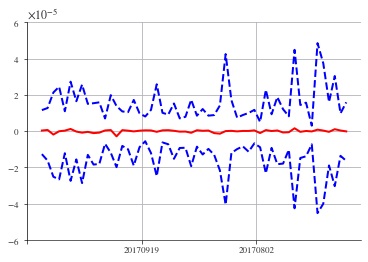

In [16]:
fig, ax = plt.subplots()

_=ax.plot(pd.DataFrame(median).mean(axis=0), color ='r')
_=ax.plot(pd.DataFrame(quantiles25).mean(axis=0), linestyle='--', color ='blue')
_=ax.plot(pd.DataFrame(quantiles75).mean(axis=0),color= 'blue', linestyle='--')
start, end = ax.get_xlim()
plt.xticks(fontsize =9)
plt.yticks(fontsize =9)
plt.grid(True)
_=ax.xaxis.set_ticks(np.arange(start, end, 20))

In [377]:

def labelling_simple_all(input_array, updown_pct):
    
    if np.all( (1+updown_pct)*input_array[:-1] <= input_array[-1] ):
        return 1
    else:
        
        return -1


In [378]:
#filedateIdx[['ReturnTradedPrice']][:-1] #.rolling(window=5, min_periods=2).apply(lambda t:labelling_simple_all(t, updown_pct=0.0001)) 

In [379]:
#filedateIdx[['ReturnTradedPrice']].rolling(window =5, min_periods =2 ).apply(lambda t: labelling_simple_all( t, 0.2))

In [380]:
x =filedateIdx[['ReturnTradedPrice']].rolling(window =5, min_periods =1 ).mean()*(1+0.0002) -filedateIdx[['ReturnTradedPrice']].rolling(window =15, min_periods =2 ).mean()

In [17]:
ranges = [ -0.000083, -0.000041, 0.000041]
print (x.quantile(0.1), x.quantile(0.25), x.quantile(0.75))

-5.843596590558518e-05 -2.9226947713453786e-05 2.9143898460493306e-05


In [18]:
pd.DataFrame(x).describe()

,ReturnTradedPrice
count,6.645000e+03
mean,-5.903673e-07
std,6.447265e-05
min,-1.787212e-03
25%,-2.922695e-05
50%,-7.878536e-19
75%,2.914390e-05
max,1.728963e-03


## 9.010484e-05  #0.000023.
0.00009010484/2

In [19]:
trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter, ccy_bar=1000)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)

labelling_method_params = [
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 40,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.00005,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 8,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.00009,
    'threshold_method': ThresholdMethod.arbitrary,},
{
    'labelling_method': LabellingChoice.price_move_in_window,
    'rolling_window': 24,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.00005,
    'threshold_method': ThresholdMethod.arbitrary,}
    ,
{
    'labelling_method': LabellingChoice.ep_in_window,
    'rolling_window': 9,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0004,
    'threshold_method': ThresholdMethod.arbitrary,},
    {
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 15,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.0001},
    {
    'labelling_method': LabellingChoice.ma_in_window,
    'rolling_window': 15,
    # Uncomment below if you want to check a price move only above a certain level
    'updown_threshold': 0.000028}]



In [59]:
alternate_label_values =['label_PrMov__window_5__thres_arbitrary__0.1',
                         'label_PrMov__window_40__thres_arbitrary__0.0',
                         'label_MovAv__window_8__thres_arbitrary__0.0',
                         'label_PrMov__window_24__thres_arbitrary__0.0',
                         'label_EndPo__window_9__thres_arbitrary__0.0',
                         'label_MovAv__window_15__thres_arbitrary__0.0']

LabelsAlternateNames = ['LabelsAlternateOne', 'LabelsAlternateTwo',  
                        'LabelsAlternateThree', 'LabelsAlternateFour',  
                        'LabelsAlternateFive', 'LabelsAlternateSix']


In [60]:

### 
index =symbolIdx # correspond to a symbol
# for index in range(20,56):
print("index --->", index)
ticker = str(symbols[index])
print(ticker)
nonDirectionalSymbol = get_symbol_path(index) # the non-directional labels path
print(nonDirectionalSymbol)
listofDates = sorted(get_files_for_ticker(ticker))
print ('Ticker', ticker, ' and labels', len(listofDates))
# v stupid check but necessary- maybe cache is the issue but whatever
print(sorted(listofDates)[len(listofDates)-1] ==listofDates[-1])

# ## step 1
sd = listofDates[0] # this must be set to 0 otherwirse it is problematic
ed = listofDates[2] # added a check before
print(sd, ed)

index ---> 4
BARC.L
/media/ak/DataOnly/ProcessedData/labels/BARC.L/NON_DIRECTIONAL
Ticker BARC.L  and labels 55
True
20170116 20170118


In [323]:

# trading_hours_filter = TradingHours.only_mkt_hours

# data_loader = DataLoader(trading_hours_filter)

# data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)

## Label construction starts here

In [62]:

### 
# index =38 # correspond to a symbol
# for index in [39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]:
##for index in [31, 32, 33, 34, 35 ,36, 37, 38 ,39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]:
print("index --->", index)
ticker = str(symbols[symbolIdx])
print(ticker)
nonDirectionalSymbol = get_symbol_path(index) # the non-directional labels path
print(nonDirectionalSymbol)
listofDates = sorted(get_files_for_ticker(ticker))
print ('Ticker', ticker, ' and labels', len(listofDates))
# v stupid check but necessary- maybe cache is the issue but whatever
print(sorted(listofDates)[len(listofDates)-1] ==listofDates[-1])

## step 1
sd = listofDates[0] # this must be set to 0 otherwirse it is problematic
ed = listofDates[len(listofDates)-1] # added a check before

trading_hours_filter = TradingHours.only_mkt_hours

data_loader = DataLoader(trading_hours_filter)

data = data_loader.load_trades_data(ticker, start_date=sd, end_date=ed)

# this is the core of label creation ## 
for label_init in labelling_method_params:
    labeller = DataLabellingSimple(label_init)
    the_label = labeller.get_label_name()
    labeller.label_training_data(data)
print('Finished Creating Labels')  
print((list(data.keys())))

# ## step 2 - this is BS
print(data[list(data.keys())[0]].filter(like='label', axis=1).columns.values)
## step 3
dfs = defaultdict(dict)
for idex , dateIdex in enumerate(list(data.keys())):
    print(idex)
    print('Date:', dateIdex)
    for alternate_label_value_idex, alternate_label_value in enumerate(alternate_label_values):
        print('Current Alternate Label Value: ',LabelsAlternateNames[alternate_label_value_idex])        
        df = data[dateIdex][['TradedTime', 'TradedPrice', 'ReturnTradedPrice', 'Volume','Duration',str(alternate_label_value)]]

        label_symbol_date_path = os.path.join(dataOnlyDrive,LabelsAlternateNames[alternate_label_value_idex], ticker)

        filename = os.path.join(label_symbol_date_path,dateIdex+'.csv')
        print(filename)

        if os.path.exists(label_symbol_date_path) ==True:
            print('Saving the dataframe CSV')
            print('path_exists')
            df.to_csv(filename)
        else:
            os.makedirs(label_symbol_date_path)
            print('Produced this directory: ', label_symbol_date_path)
            df.to_csv(filename)
print('### Finished###')

index ---> 4
BARC.L
/media/ak/DataOnly/ProcessedData/labels/BARC.L/NON_DIRECTIONAL
Ticker BARC.L  and labels 55
True
Finished Creating Labels
['20170116', '20170117', '20170118', '20170119', '20170120', '20170123', '20170124', '20170125', '20170126', '20170127', '20170130', '20170131', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20170901', '20170904', '20170905', '20170906', '20170907', '20170908', '20170911', '20170912', '20170913', '20170914', '20170915', '20170918', '20170919', '20170920', '20170921', '20170922', '20170925', '20170926', '20170927', '20170928', '20170929']
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label

Current Alternate Label Value:  LabelsAlternateTwo
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateTwo/BARC.L/20170126.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/BARC.L/20170126.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFour/BARC.L/20170126.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170126.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateSix/BARC.L/20170126.csv
Saving the dataframe CSV
path_exists
9
Date: 20170127
Current Alternate Label Value:  LabelsAlternateOne
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateOne/BARC.L/20170127.csv
Saving the

Current Alternate Label Value:  LabelsAlternateFour
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFour/BARC.L/20170808.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170808.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateSix/BARC.L/20170808.csv
Saving the dataframe CSV
path_exists
18
Date: 20170809
Current Alternate Label Value:  LabelsAlternateOne
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateOne/BARC.L/20170809.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateTwo/BARC.L/20170809.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/BARC.L/20170809.csv
Saving th

Current Alternate Label Value:  LabelsAlternateFour
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFour/BARC.L/20170818.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170818.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateSix/BARC.L/20170818.csv
Saving the dataframe CSV
path_exists
26
Date: 20170821
Current Alternate Label Value:  LabelsAlternateOne
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateOne/BARC.L/20170821.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateTwo/BARC.L/20170821.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/BARC.L/20170821.csv
Saving th

Current Alternate Label Value:  LabelsAlternateThree
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/BARC.L/20170905.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFour/BARC.L/20170905.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFive
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170905.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateSix/BARC.L/20170905.csv
Saving the dataframe CSV
path_exists
37
Date: 20170906
Current Alternate Label Value:  LabelsAlternateOne
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateOne/BARC.L/20170906.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateTwo/BARC.L/20170906.csv
Saving th

Current Alternate Label Value:  LabelsAlternateFive
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170918.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateSix
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateSix/BARC.L/20170918.csv
Saving the dataframe CSV
path_exists
46
Date: 20170919
Current Alternate Label Value:  LabelsAlternateOne
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateOne/BARC.L/20170919.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateTwo
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateTwo/BARC.L/20170919.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateThree
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateThree/BARC.L/20170919.csv
Saving the dataframe CSV
path_exists
Current Alternate Label Value:  LabelsAlternateFour
/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFour/BARC.L/20170919.csv
Saving th

In [416]:
print(data[list(data.keys())[0]].filter(like='label', axis=1).columns.values)

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']


In [417]:
data_keys  = list(data.keys())
dict_1 =dict()
dict_2 =dict()
dict_3 =dict()
dict_4 =dict()
dict_5 =dict()
dict_6 =dict()
# ----------------- # ------------------- # ------------------------------------- #
for keyIdx, _ in enumerate(data_keys):
    dict_1[keyIdx] = (data[data_keys[keyIdx]]['label_PrMov__window_5__thres_arbitrary__0.1'].value_counts())
    dict_2[keyIdx] =(data[data_keys[keyIdx]]['label_PrMov__window_40__thres_arbitrary__0.0'].value_counts())
    dict_3[keyIdx] =(data[data_keys[keyIdx]]['label_MovAv__window_8__thres_arbitrary__0.0'].value_counts())

    dict_4[keyIdx] =(data[data_keys[keyIdx]]['label_PrMov__window_24__thres_arbitrary__0.0'].value_counts())
    dict_5[keyIdx] =(data[data_keys[keyIdx]][ 'label_EndPo__window_9__thres_arbitrary__0.0'].value_counts())

    dict_6[keyIdx] =(data[data_keys[keyIdx]]['label_MovAv__window_15__thres_arbitrary__0.0'].value_counts())




In [418]:
print(pd.DataFrame(dict_1).mean(axis=1)) #label 1
print(pd.DataFrame(dict_2).mean(axis=1)) # label 2
print(pd.DataFrame(dict_3).mean(axis=1)) # label 3 # best
print(pd.DataFrame(dict_4).mean(axis=1)) # label 4
print(pd.DataFrame(dict_5).mean(axis=1)) # label 5
print(pd.DataFrame(dict_6).mean(axis=1)) # label 6



0.0    2810.545455
1.0     109.900826
dtype: float64
1.0    2337.099174
0.0     548.347107
dtype: float64
-1.0    977.404959
 0.0    963.710744
 1.0    976.330579
dtype: float64
1.0    2216.619835
0.0     684.826446
dtype: float64
-1.0     817.008264
 0.0    1289.181818
 1.0     810.256198
dtype: float64
-1.0    1300.545455
 0.0     300.487603
 1.0    1309.413223
dtype: float64


In [405]:
os.path.isfile('/media/ak/DataOnly/ProcessedData/labels/IEER.L/NON_DIRECTIONAL/20170703.csv')

True

In [329]:
# for idex , dateIdex in enumerate(list(data.keys())):
#     print(idex)
#     print('Date:', dateIdex)
#     for alternate_label_value_idex, alternate_label_value in enumerate(alternate_label_values):
#         print('Current Alternate Label Value: ',LabelsAlternateNames[alternate_label_value_idex])        
#         df = data[dateIdex][['TradedTime', 'TradedPrice', 'ReturnTradedPrice', 'Volume',
#        'Duration',str(alternate_label_value)]]

#         label_symbol_date_path = os.path.join(dataOnlyDrive,LabelsAlternateNames[alternate_label_value_idex], ticker)

#         filename = os.path.join(label_symbol_date_path,dateIdex+'.csv')

#         if os.path.exists(label_symbol_date_path) ==True:
#             print('Saving the dataframce CSV')
#             print('path_exists')
#             df.to_csv(filename)
#         else:
#             os.makedirs(label_symbol_date_path)
#             print('Produced this directory: ', label_symbol_date_path)
#             df.to_csv(filename)


## example visualisation to be moved to a different script


In [330]:
from IPython.display import display
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import string

In [331]:
keys=list(data.keys())
from collections import defaultdict
labelsDict_1 = defaultdict(dict)
labelsDict_2 = defaultdict(dict)

for key in keys:
    df =pd.DataFrame(data[key])
    differentLabelTypes = df.filter(like='label', axis=1).columns.values
    print(differentLabelTypes)
    print(differentLabelTypes.shape[0])
    for i in range(differentLabelTypes.shape[0]):
        #print(i)
        try:
            #print(key)
            labelsDict_1[differentLabelTypes[i]][key] = df[differentLabelTypes[i]].value_counts()[1]
            labelsDict_2[differentLabelTypes[i]][key] = df[differentLabelTypes[i]].value_counts()[0]

        except:
            print('continuing')
            continue

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary__0.0'
 'label_PrMov__window_24__thres_arbitrary__0.0'
 'label_EndPo__window_9__thres_arbitrary__0.0'
 'label_MovAv__window_15__thres_arbitrary__0.0']
6
['label_PrMov__window_5__thres_arbitrary__0.1'
 'label_PrMov__window_40__thres_arbitrary__0.0'
 'label_MovAv__window_8__thres_arbitrary_

In [332]:
dfFromDict = df.from_dict(labelsDict)
dfDesc = df.from_dict(labelsDict).describe()


In [333]:
dfDesc_1 = df.from_dict(labelsDict_1)
dfDesc_2 = df.from_dict(labelsDict_2)

In [334]:
differentLabelTypes[5]

'label_MovAv__window_15__thres_arbitrary__0.0'

In [339]:
labelsDict

defaultdict(dict,
            {'label_PrMov__window_5__thres_arbitrary__0.1': {'20170116': 0.03378132945877225,
              '20170117': 0.04352895452778857,
              '20170118': 0.04316546762589928,
              '20170119': 0.026845637583892617,
              '20170120': 0.044142614601018676,
              '20170123': 0.05006418485237484,
              '20170124': 0.036139455782312924,
              '20170125': 0.043249341857841295,
              '20170126': 0.04280618311533888,
              '20170127': 0.03488879197557784,
              '20170130': 0.046118721461187215,
              '20170131': 0.017704778156996587,
              '20170703': 0.004819277108433735,
              '20170704': 0.00788436268068331,
              '20170705': 0.00853932584269663,
              '20170706': 0.007874015748031496,
              '20170707': 0.017459361830222758,
              '20170710': 0.01412989588497769,
              '20170711': 0.014940239043824702,
              '20170712': 0.0127

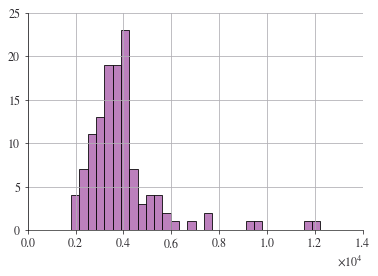

In [340]:
import matplotlib.pyplot as plt
%matplotlib inline
balanceKeys = labelsDict_1.keys()

df.from_dict(labelsDict_1)[differentLabelTypes[1]].hist(bins=30)

# plt.axvline(df.from_dict(labelsDict)[differentLabelTypes[1]].median(), color='r', linestyle='dashed', linewidth=1)
# x= df.from_dict(labelsDict)[differentLabelTypes[1]]
# print([differentLabelTypes[3]])
# min_ylim, max_ylim = plt.ylim()
# plt.figtext(x.median()*0.3, max_ylim*0.9, 'Median: {:.2f}'.format(x.median()), fontsize =15)
# plt.figtext(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()), fontsize =15)
# plt.annotate(r"$\}$",fontsize=24,
#             xy=(0.27, 0.77), xycoords='figure fraction'
#             )
# plt.text(13.1,1, text , fontsize=15)
plt.show()

['label_PrMov__window_24__thres_arbitrary__0.0']


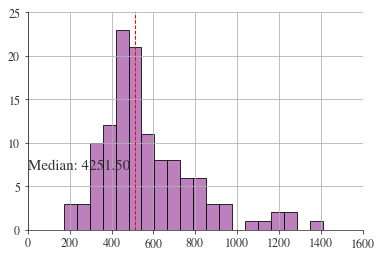

In [342]:
df.from_dict(labelsDict_2)[differentLabelTypes[1]].hist(bins=20)
plt.axvline(df.from_dict(labelsDict_2)[differentLabelTypes[1]].median(), color='r', linestyle='dashed', linewidth=1)
x= df.from_dict(labelsDict_2)[differentLabelTypes[0]]
print([differentLabelTypes[3]])
min_ylim, max_ylim = plt.ylim()
plt.text(2.3, 6.9, 'Median: {:.2f}'.format(x.median()), fontsize =15)
# plt.text(x.std()*1.1, max_ylim*0.7, 'StDev: {:.2f}'.format(x.std()), fontsize =15)
# plt.annotate(r"$\}$",fontsize=24,
#             xy=(0.27, 0.77), xycoords='figure fraction'
#             )
# plt.figtext(.95, .49, describe_helper(pd.Series(x))[0], {'multialignment':'left'})
# plt.figtext(1.05, .49, describe_helper(pd.Series(x))[1], {'multialignment':'right'})
plt.show()




In [56]:
import seaborn as sns
from scipy.stats import norm
import numpy as np
def price_based_histogram_labels(x, labelText):
    x= np.array(x.dropna())
    ax = sns.distplot(x, fit=norm, kde=True, bins=20)
   # _=ax.text(x.std()*0.5, max_ylim*0.5, 'Median: {:.2f}'.format(np.median(x)), {'multialignment':'right'})
    _=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
    #_=ax.axhline(np.std(x)*0.9, color='r', linestyle='dashed', linewidth=1)
    _=ax.text(0.9, 1.1, 'StDev: {:.2f}'.format(x.std()))
    #plt.title('Rolling window of ' + labelText.split("_")[4] + ' , threshold ' + labelText.split("_")[-1] )
    plt.tight_layout() 
    plt.show()
# for i in range(0,5):
#     x= df.from_dict(labelsDict_1)[differentLabelTypes[i]]
#     price_based_histogram_labels(x, labelText= differentLabelTypes[i])

NameError: name 'differentLabelTypes' is not defined

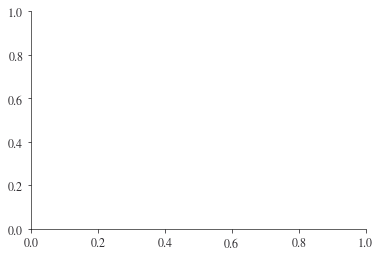

In [57]:
fig, ax = plt.subplots()
labelIdx = 4
label = str(differentLabelTypes[labelIdx])
x= np.array(df.from_dict(labelsDict_1)[differentLabelTypes[labelIdx]].dropna())
ax = sns.distplot(x, fit=norm, kde=True, bins=30, label =label)
_=ax.axvline(np.median(x), color='r', linestyle='dashed', linewidth=2)
ax.set_xlabel('Proportion of labels') # <--------------- Set x axis label
ax.set_ylabel('Frequency') # <--------- Set y axis label
ax.legend(loc='best') # <-------- Move the legend
sns.despine()

In [94]:
import pickle
mkl_path = '/media/ak/DataOnly/ExperimentCommonLocs/MKLOOSPredictions/' 
file_name = os.path.join(mkl_path, 'CPG.L_check_dict.pkl')
file_name_all_good = os.path.join(mkl_path, 'CPG.Lall_good_dict.pkl')

In [95]:
os.listdir(mkl_path)

['CPG.Lall_good_dict.pkl',
 'CPG.L_check_dict.pkl',
 'check_dict.pkl',
 'BARC.L_check_dict.pkl',
 'BARC.Lall_good_dict.pkl']

In [96]:
# Load data (deserialize)
with open(file_name, 'rb') as handle:
    unserialized_data = pickle.load(handle)

In [97]:
# Load data (deserialize)
with open(file_name_all_good, 'rb') as handle:
    all_good_data = pickle.load(handle)